In [1]:
# Import the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')



In [3]:
# Get the first 5 rows of both df
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
# Merge the data for further analysis

customer_transactions = pd.merge(customers_df, transactions_df, on='CustomerID')

In [ ]:
customer_transactions

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


In [7]:
# feature engineering


customer_transactions['TotalSpend'] = customer_transactions.groupby('CustomerID')['TotalValue'].transform('sum')
customer_transactions['AvgTransactionValue'] = customer_transactions.groupby('CustomerID')['TotalValue'].transform('mean')
customer_transactions['NumTransactions'] = customer_transactions.groupby('CustomerID')['TransactionID'].transform('count')

In [8]:
# Selecting the relevant features

features = customer_transactions[['CustomerID', 'Region', 'TotalSpend', 'AvgTransactionValue', 'NumTransactions']]
features = features.drop_duplicates().set_index('CustomerID')

In [9]:
# Importing required Libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA


# Data Preprocessing
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TotalSpend', 'AvgTransactionValue', 'NumTransactions']),
        ('cat', OneHotEncoder(), ['Region'])
    ])

In [10]:
# Fit and transform the data
features_processed = preprocessor.fit_transform(features)

In [11]:
# Clustering

# Choose the number of clusters (between 2 and 10)
num_clusters = 4

In [12]:
# Fit the K-Means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_processed)

In [13]:
# Add the cluster labels to the features DataFrame
features['Cluster'] = clusters

In [14]:
# Clustering Metrics

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(features_processed, clusters)

In [15]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(features_processed, clusters)

In [16]:
# Print the clustering metrics
print(f'Number of clusters: {num_clusters}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Number of clusters: 4
Davies-Bouldin Index: 1.342184356995347
Silhouette Score: 0.22808346780803854


In [17]:
# Visualization

# Reduce the dimensionality of the data using PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_processed)

In [18]:
# Create a DataFrame for the PCA results

pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters


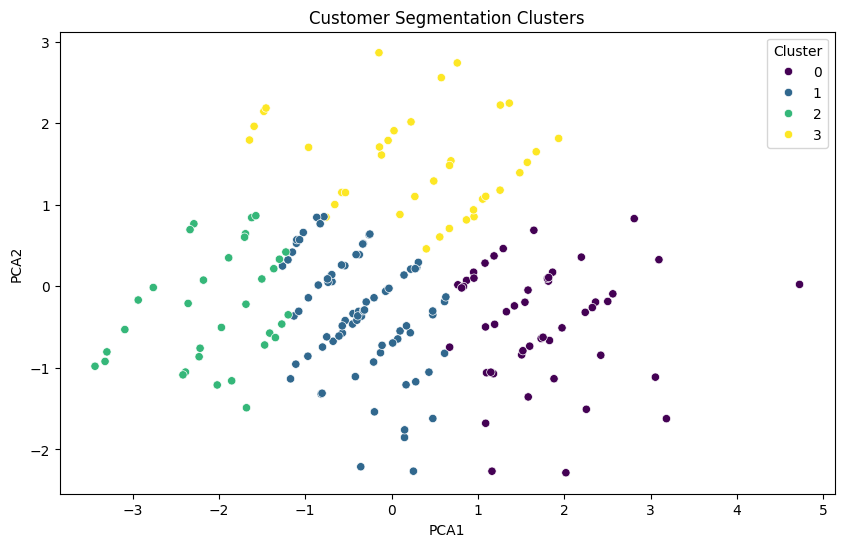

In [19]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()

In [20]:
# Save the clustering results to a CSV file
features.reset_index().to_csv('Gopal_Kate_Clustering.csv', index=False)

In [21]:
# Display the first few rows of the clustering results
features.head()

,Region,TotalSpend,AvgTransactionValue,NumTransactions,Cluster
CustomerID,,,,,
C0001,South America,3354.52,670.904,5,1
C0002,Asia,1862.74,465.685,4,2
C0003,South America,2725.38,681.345,4,1
C0004,South America,5354.88,669.360,8,0
C0005,Asia,2034.24,678.080,3,1
